In [2]:
import numpy as np
from datascience import *
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn import *
from sklearn.model_selection import train_test_split
from datetime import datetime, timezone
import missingno as msno
import seaborn as sns
import math

In [3]:
gngLog984 = pd.read_csv("984_gonogo.csv")
gngLog966 = pd.read_csv("966_gonogo.csv")
gngLog963 = pd.read_csv("963_gonogo.csv")
gngLog962 = pd.read_csv("962_gonogo.csv")
gngLog961 = pd.read_csv("961_gonogo.csv")
gngLog946 = pd.read_csv("946_gonogo.csv")
gngLog942 = pd.read_csv("942_gonogo.csv")
gngLog937 = pd.read_csv("937_gonogo.csv")
gngLog877 = pd.read_csv("877_gonogo.csv")
gngLog820 = pd.read_csv("820_gonogo.csv")
gngLog793 = pd.read_csv("793_gonogo.csv")
gngLog1058 = pd.read_csv("1058_gonogo.csv")
gngLog1056 = pd.read_csv("1056_gonogo.csv")

gngAggregate = pd.read_csv("gonogo_aggregated.csv")

gngLog = [gngLog793, gngLog820, gngLog877, gngLog937, gngLog942, gngLog961, gngLog962, gngLog963, gngLog984]
gngLogNames = ['793', '820', '877', '937', '942', '961', '962', '963', '984']

gngAggregate

,Participant_ID,LD_order,LD_totcor,LD_toterr,LD_comerr,LD_ommerr,LD_avgRToverall,LD_avgRTcomerr,LD_avgRTcor,HD_order,...,Gen_datetimebeg,Gen_datetimeend,prac_unixbeg,prac_unixend,prac_datetimebeg,prac_datetimeend,exp_unixbeg,exp_unixend,exp_datetimebeg,exp_datetimeend
0,4,1,91.0,9.0,8.0,1.0,0.240000,0.250000,0.240000,2.0,...,0.46,0.46,1.576252e+12,1.576253e+12,0.45,0.46,1.576253e+12,1.576253e+12,0.46,0.46
1,877,3,69.0,31.0,11.0,20.0,0.360000,0.370000,0.360000,2.0,...,0.51,0.52,1.579627e+12,1.579627e+12,0.51,0.51,1.579627e+12,1.579628e+12,0.51,0.52
2,820,1,79.0,21.0,5.0,16.0,0.390000,0.370000,0.390000,2.0,...,0.52,0.53,1.578936e+12,1.578936e+12,0.52,0.52,1.578936e+12,1.578937e+12,0.52,0.53
3,937,2,94.0,6.0,4.0,2.0,0.320000,0.320000,0.320000,3.0,...,0.53,0.54,1.581098e+12,1.581098e+12,0.53,0.53,1.581098e+12,1.581098e+12,0.53,12/30/1899
4,793,3,80.0,20.0,2.0,18.0,0.375441,0.309781,0.377559,2.0,...,01:11:07 PM,01:14:16 PM,1.582049e+12,1.582049e+12,01:09:55 PM,01:10:56 PM,1.582049e+12,1.582050e+12,01:11:07 PM,01:21:58 PM
5,942,3,83.0,17.0,6.0,11.0,0.185488,0.388786,0.167810,1.0,...,12:50:45 PM,12:53:51 PM,1.582134e+12,1.582134e+12,12:45:29 PM,12:46:30 PM,1.582134e+12,1.582135e+12,12:46:45 PM,12:57:21 PM
6,961,3,85.0,15.0,5.0,10.0,0.355361,0.370567,0.354274,2.0,...,12:55:07 PM,12:58:19 PM,1.582740e+12,1.582740e+12,12:53:55 PM,12:54:55 PM,1.582740e+12,1.582740e+12,12:55:07 PM,1:06:06 PM
7,963,2,90.0,10.0,5.0,5.0,0.346504,0.349026,0.346335,1.0,...,11:55:46 AM,11:58:55 AM,1.582649e+12,1.582649e+12,11:46:37 AM,11:47:37 AM,1.582649e+12,1.582650e+12,11:47:56 AM,11:58:55 AM
8,984,3,90.0,10.0,4.0,6.0,0.353533,0.343012,0.354102,1.0,...,11:29:37 AM,11:32:50 AM,1.582734e+12,1.582734e+12,11:24:04 AM,11:25:05 AM,1.582734e+12,1.582735e+12,11:25:23 AM,11:36:40 AM
9,962,2,95.0,5.0,3.0,2.0,0.304920,0.336608,0.303701,1.0,...,12:23:55 PM,12:26:54 PM,1.583515e+12,1.583515e+12,12:15:05 PM,12:16:06 PM,1.583515e+12,1.583516e+12,12:16:24 PM,12:26:54 PM


In [4]:
gngAggregate = gngAggregate.drop(index=0)
gngAggregate = gngAggregate.sort_values(by='Participant_ID', ascending=True)

gngLogNames

['793', '820', '877', '937', '942', '961', '962', '963', '984']

In [5]:
gngLog

[                        pseudo                  imagefile condition corAns  \
 0    conditions\practice1.xlsx             prac\daisy.jpg        go  space   
 1    conditions\practice1.xlsx  prac\plasticflower03b.jpg        go  space   
 2    conditions\practice1.xlsx        prac\stapler04a.jpg      nogo   none   
 3    conditions\practice1.xlsx           prac\leaf03a.jpg        go  space   
 4    conditions\practice1.xlsx         prac\waterlily.jpg        go  space   
 ..                         ...                        ...       ...    ...   
 327   conditions\food_ld2.xlsx        household1\1089.jpg        go  space   
 328   conditions\food_ld2.xlsx        household1\1234.jpg        go  space   
 329   conditions\food_ld2.xlsx        household1\1092.jpg        go  space   
 330   conditions\food_ld2.xlsx                        NaN       NaN    NaN   
 331                        NaN                        NaN       NaN    NaN   
 
                     choblock                 tex 

In [6]:
# df.loc[df['B'] == 3, 'A']

# # gngLog.iloc[3]

# def refineLog(gngLog):
#     result = gngLog.copy()
#     changes = False
#     for i in range(len(result)):
#         if(i<len(result)):
#             if(result['corAns'].iloc[i] == "space" and result['corAns'].iloc[i+1] == "space"):
#                 result.at[i, 'unixend'] = result['unixend'].iloc[i+1]
#                 result.drop(index=i+1, inplace=True)
# #     result.drop(result[result['corAns'].isna()].index, inplace=True)
#     result = result[result['corAns'] != 'none']
#     result = result.dropna(subset=['corAns'])
#     result = result.reset_index(drop=True)


#     return result

# def getComissionError():
#     num_correct = gngLog['key_exp.corr'].sum()
#     num_total = len(gngLog)
#     percent_correct = (num_correct / num_total) * 100

#     print(f"Percentage of correct responses: {percent_correct:.2f}%")
    
def metrics(gngLog):
    
    totalTrials = gngLog['corAns'].count()
    n_correct = sum(gngLog['key_exp.corr'] == 1)
#     print(n_correct)
    commission = sum((gngLog['key_exp.keys'] == 'space') & (gngLog['condition'] == 'nogo'))
#     print(sum((gngLog['key_exp.corr'] == 0)))
#     print(sum((gngLog['corAns'] == 'none')))

    ommission = sum((gngLog['key_exp.keys'] == 'None') & (gngLog['condition'] == 'go'))

    omission_errors = ommission
    commission_errors = commission
    accuracy = n_correct
    avg_response_time = avg_rt = gngLog['key_exp.rt'].mean()
    
    metricsBundle = [totalTrials, accuracy, avg_response_time, omission_errors, commission_errors]
#     print(metricsBundle)
    return metricsBundle


def split_df(gngLog, return_type):
    # Create empty DataFrames
    result = pd.DataFrame()

    # Iterate over each row in the original DataFrame
    for index, row in gngLog.iterrows():
        imageType = row['choblock']
        if isinstance(imageType, str):
#             print(imageType)
#             if((r"conditions\food_hd.xlsx" in imageType)):
#                 print(imageType)
            if return_type == 'HD' and imageType == r"conditions\food_hd.xlsx":
                # Add row to HDdf
                result = result.append(row)
            elif return_type == 'LD' and imageType == r"conditions\food_ld.xlsx":
                # Add row to LDdf
                result = result.append(row)
            elif return_type == 'Gen' and imageType == r"conditions\general.xlsx":
                # Add row to gendf
                result = result.append(row)

    # Reset index of the new DataFrames
    result.reset_index(drop=True, inplace=True)
    return result

In [22]:
def makeGraph(dataType, errorType):
    generated = [0, 0, 0, 0, 0, 0, 0, 0, 0]
    for i in range(len(generated)):
        generated[i] = metrics(split_df(gngLog[i], dataType))
    print(dataType)
    if(dataType == "Gen"):
        dataTypeNum = 2
    elif(dataType == "HD"):
        dataTypeNum = 0
    elif(dataType == "LD"):
        dataTypeNum = 1
    dataTypeNum = 0


    if(errorType ==  "Om"):
        for i in range(len(generated)):
            generated[i] = generated[i][3]
        y2_values = gngAggregate[dataType + '_ommerr']
#         print(y2_values, y1_values)

    if(errorType ==  "Com"):
        for i in range(len(generated)):
            generated[i] = generated[i][4]
        y2_values = gngAggregate[dataType + '_comerr']
#         print(y2_values, y1_values)


    y1_values = generated

    x_values = range(len(gngAggregate))
    participant_ids = gngAggregate['Participant_ID']

    # Plotting
    plt.figure(figsize=(8, 6))

    # Scatter plot for the first column (red dots)
    plt.scatter(x_values, y1_values, color='red', label='Produced')

    # Scatter plot for the second column (blue dots)
    plt.scatter(x_values, y2_values, color='blue', label='From File')

    # Adding x-axis labels
    plt.xticks(x_values, participant_ids)

    # Adding labels and title
    plt.xlabel('Participant')
    plt.ylabel('Error Rate')
    plt.title(dataType)

    # Adding legend
    plt.legend()
    print('Values Match')
    # Display the plot
    plt.show()


In [8]:
# Process:
commission_error = []
omission_error = []

gngSplit = []
splitArray =[]

for i in range(len(gngLog)):
    splitArray = [split_df(gngLog[i], "HD"), split_df(gngLog[i], "LD"), split_df(gngLog[i], "gen")]
    gngSplit.append(splitArray)

# z = metrics(gngSplit[2][0])

In [9]:
h = metrics(gngSplit[0][0])
h

[100, 85, 0.3757865973420336, 12, 3]

In [10]:
coErrorHD = []
coErrorLD = []
coErrorGEN = []

omErrorHD = []
omErrorLD = []
omErrorGEN = []


for i in range(len(gngSplit)):
    gngSplit[i][0] = metrics(gngSplit[i][0])
    gngSplit[i][1] = metrics(gngSplit[i][1])
    gngSplit[i][2] = metrics(gngSplit[i][2])
    
    coErrorHD.append(gngSplit[i][0][3])
    coErrorLD.append(gngSplit[i][1][3])
    coErrorGEN.append(gngSplit[i][2][3])

    omErrorHD.append(gngSplit[i][0][4])
    omErrorLD.append(gngSplit[i][1][4])
    omErrorGEN.append(gngSplit[i][2][4])


#     gngLog[i] = metrics(gngLog[i])
#     omission_error.append(gngLog[i][j][3])
#     commission_error.append(gngLog[i][j][4])
    

KeyError: 'corAns'

In [11]:
omErrors = [omErrorHD, omErrorLD, omErrorGEN]
coErrors = [coErrorHD, coErrorLD, coErrorGEN]


# for i in range(len(omErrors)):
#     for j in range(len(omErrors[i])):
#         omErrors[i][j] = omErrors[i][j] * 100
        
# for i in range(len(coErrors)):
#     for j in range(len(coErrors[i])):
#         coErrors[i][j] = coErrors[i][j] * 100
        


gngSplit[2][0]
omErrors

[[], [], []]

In [12]:
gngLogNames

['793', '820', '877', '937', '942', '961', '962', '963', '984']

In [13]:
gngAggregate.columns
commission_errors = gngAggregate['LD_comerr'].values + gngAggregate['HD_comerr'].values + gngAggregate['Gen_comerr'].values + gngAggregate['prac_comerr'].values
gngAggregate

,Participant_ID,LD_order,LD_totcor,LD_toterr,LD_comerr,LD_ommerr,LD_avgRToverall,LD_avgRTcomerr,LD_avgRTcor,HD_order,...,Gen_datetimebeg,Gen_datetimeend,prac_unixbeg,prac_unixend,prac_datetimebeg,prac_datetimeend,exp_unixbeg,exp_unixend,exp_datetimebeg,exp_datetimeend
4,793,3,80.0,20.0,2.0,18.0,0.375441,0.309781,0.377559,2.0,...,01:11:07 PM,01:14:16 PM,1.582049e+12,1.582049e+12,01:09:55 PM,01:10:56 PM,1.582049e+12,1.582050e+12,01:11:07 PM,01:21:58 PM
2,820,1,79.0,21.0,5.0,16.0,0.390000,0.370000,0.390000,2.0,...,0.52,0.53,1.578936e+12,1.578936e+12,0.52,0.52,1.578936e+12,1.578937e+12,0.52,0.53
1,877,3,69.0,31.0,11.0,20.0,0.360000,0.370000,0.360000,2.0,...,0.51,0.52,1.579627e+12,1.579627e+12,0.51,0.51,1.579627e+12,1.579628e+12,0.51,0.52
3,937,2,94.0,6.0,4.0,2.0,0.320000,0.320000,0.320000,3.0,...,0.53,0.54,1.581098e+12,1.581098e+12,0.53,0.53,1.581098e+12,1.581098e+12,0.53,12/30/1899
5,942,3,83.0,17.0,6.0,11.0,0.185488,0.388786,0.167810,1.0,...,12:50:45 PM,12:53:51 PM,1.582134e+12,1.582134e+12,12:45:29 PM,12:46:30 PM,1.582134e+12,1.582135e+12,12:46:45 PM,12:57:21 PM
6,961,3,85.0,15.0,5.0,10.0,0.355361,0.370567,0.354274,2.0,...,12:55:07 PM,12:58:19 PM,1.582740e+12,1.582740e+12,12:53:55 PM,12:54:55 PM,1.582740e+12,1.582740e+12,12:55:07 PM,1:06:06 PM
9,962,2,95.0,5.0,3.0,2.0,0.304920,0.336608,0.303701,1.0,...,12:23:55 PM,12:26:54 PM,1.583515e+12,1.583515e+12,12:15:05 PM,12:16:06 PM,1.583515e+12,1.583516e+12,12:16:24 PM,12:26:54 PM
7,963,2,90.0,10.0,5.0,5.0,0.346504,0.349026,0.346335,1.0,...,11:55:46 AM,11:58:55 AM,1.582649e+12,1.582649e+12,11:46:37 AM,11:47:37 AM,1.582649e+12,1.582650e+12,11:47:56 AM,11:58:55 AM
8,984,3,90.0,10.0,4.0,6.0,0.353533,0.343012,0.354102,1.0,...,11:29:37 AM,11:32:50 AM,1.582734e+12,1.582734e+12,11:24:04 AM,11:25:05 AM,1.582734e+12,1.582735e+12,11:25:23 AM,11:36:40 AM


HD
Values Match


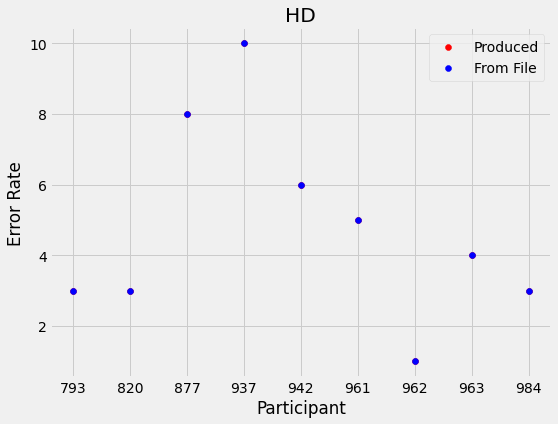

LD
Values Match


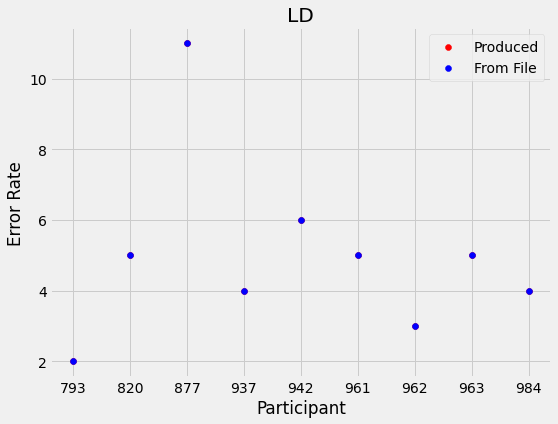

Gen
Values Match


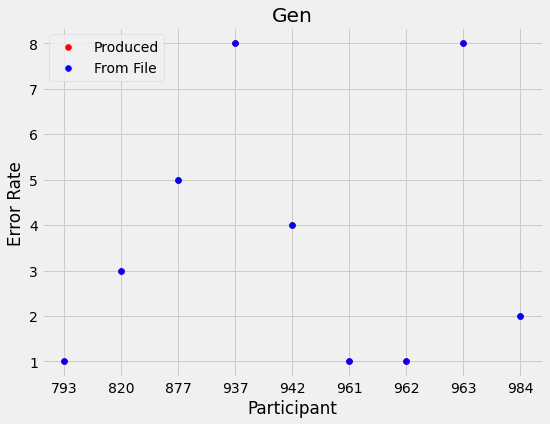

In [23]:
makeGraph("HD", "Com")
makeGraph("LD", "Com")
makeGraph("Gen", "Com")

HD
Values Match


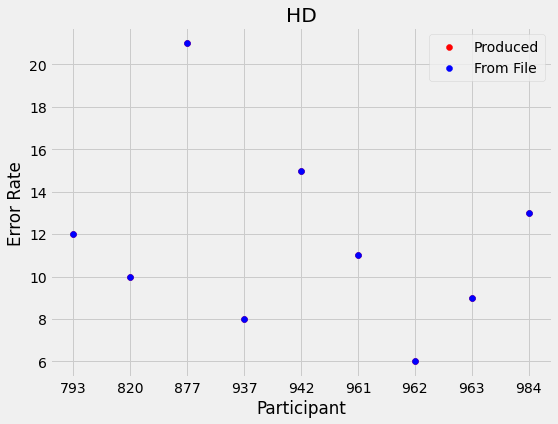

LD
Values Match


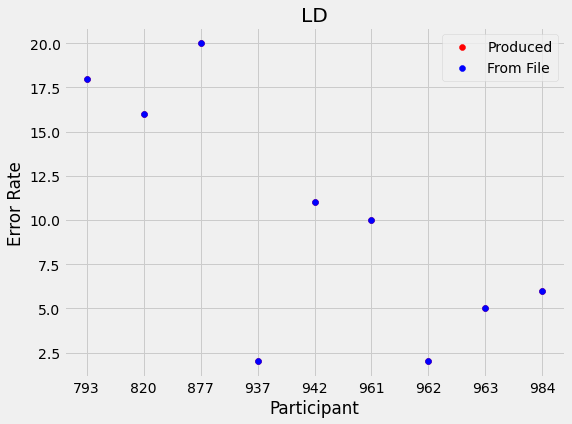

Gen
Values Match


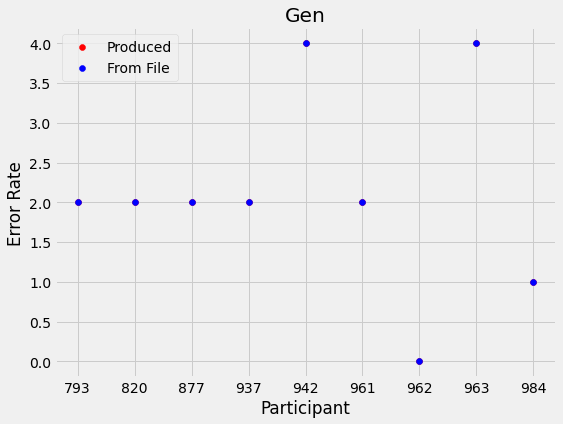

In [24]:
makeGraph("HD", "Om")
makeGraph("LD", "Om")
makeGraph("Gen", "Om")

In [ ]:
z = split_df(gngLog963, "HD")
z

In [ ]:
gngAggregate
gngAggregate = gngAggregate.drop(index=0)

In [ ]:

gngAggregate

In [ ]:
testSet = gngLog984
ldTestSet = split_df(testSet, "LD")
ldTestSetMetrics = metrics(ldTestSet)
ldTestSetMetrics